In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.ticker as ticker

In [265]:
#2 취급 데이터 동향 분석

format=pd.read_csv("데이터 보유 현황/보유_데이터_형식.csv")
shape=pd.read_csv("데이터 보유 현황/보유_데이터_형태.csv")

In [266]:
format

,데이터형식별(1),2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,데이터형식별(1),응답기업수 (개),비중 (%),응답기업수 (개),비중 (%),응답기업수 (개),비중 (%),응답기업수 (개),비중 (%),응답기업수 (개),비중 (%)
1,전체,254,-,199,-,298,-,373,-,2614,-
2,텍스트,187,73.6,78,39.2,120,40.3,235,63,1804,69
3,이미지,116,45.7,44,22.1,129,43.3,151,40.5,851,32.6
4,수치데이터,73,28.7,110,55.3,141,47.3,190,50.9,996,38.1
5,정형데이터,46,18.1,88,44.2,130,43.6,239,64.1,1097,41.9
6,비정형데이터,38,15,41,20.6,63,21.1,106,28.4,464,17.8
7,기타,27,10.6,3,1.5,0,0,0,0,0,0


In [267]:
format.columns[2::2]

Index(['2018.1', '2019.1', '2020.1', '2021.1', '2022.1'], dtype='object')

In [268]:
for i in format.columns[2::2] :
    format.loc[2:,i]=format.loc[2:,i].astype("float64")
    format.loc[2:,i]=format.loc[2:,i]/format.loc[2:,i].sum()*100

In [269]:
# 코로나가 우리에게 미친 영향 : https://news.kbs.co.kr/news/pc/view/view.do?ncd=4447307
# 사회적 거리두기로 인한 활동 제한: 코로나 대유행으로 인해 많은 국가에서 사회적 거리두기 및 봉쇄 조치가 시행되었습니다. 이로 인해 사람들의 외부 활동이 줄어들면서 이동 경로, 소비 패턴, 레저 활동 등에 대한 빅 데이터 수집이 감소했습니다.

#근무환경 변화: 재택근무가 늘어나면서 회사 내부의 네트워크 및 시스템에 대한 데이터 수집이 부분적으로 감소했습니다. 이로 인해 일부 기업은 직원의 활동을 관찰하기 어려워졌습니다.

#소비 패턴 변화: 코로나로 인한 경제적 영향으로 소비자들의 소비 패턴이 변화했습니다. 외식, 여행, 문화 생활 등에서의 소비가 감소하면서 해당 분야의 빅 데이터 수집도 감소했습니다.

#의료 데이터 수집 증가: 반면에 코로나 관련 데이터인 확진자 수, 검사 결과, 백신 접종 현황 등과 같은 의료 분야의 데이터 수집은 오히려 증가했습니다. 이는 새로운 유행병에 대한 대응 및 연구를 위해 의료 관련 정보의 중요성이 부각되었기 때문입니다.

#개인정보 보호 강화: 코로나로 인한 빅 데이터 수집 감소는 동시에 개인정보 보호에 대한 우려를 증가시켰습니다. 이로 인해 기업 및 정부는 데이터 수집 및 이용에 대한 규제를 강화하고 사용자의 개인정보를 보호하기 위한 노력을 기울이고 있습니다.

In [270]:
def print_kosis_charts(grid_x,grid_y,setcolor,df,settitle) :
    df=df.iloc[:,::2].drop(axis=0, index=[0,1]).replace("-",0)
    df["2018.1"]=df["2018.1"].astype("float64")
    df["2018.1"]=df["2018.1"].astype("float64")
    df["2019.1"]=df["2019.1"].astype("float64")
    df["2020.1"]=df["2020.1"].astype("float64")
    df["2021.1"]=df["2021.1"].astype("float64")
    df["2022.1"]=df["2022.1"].astype("float64")
    df=df.reset_index(drop=True)

    grid_size=(grid_y,grid_x)
    plt.figure(figsize=(13, 10))

    for i in range(0,df.shape[0]) : 
        y=list(map(int,df.iloc[i, 1:].values))
        max_value_index=y.index(max(y))
        #print((i,int(i/grid_y),(i%grid_x)))
        plt.subplot2grid(grid_size,(int(i/grid_x),i%grid_x), rowspan=1,colspan=1)
        plt.bar(df.columns[1:],y,color='w',edgecolor='k')
        plt.bar(max_value_index,max(y),color=setcolor,edgecolor='k')
        plt.title(df.iloc[i,0])
        plt.xticks(range(5), [f'{i}년' for i in range(2018,2023)],rotation=90)
        
    plt.suptitle(settitle, size=30)
    plt.tight_layout()
    plt.show()

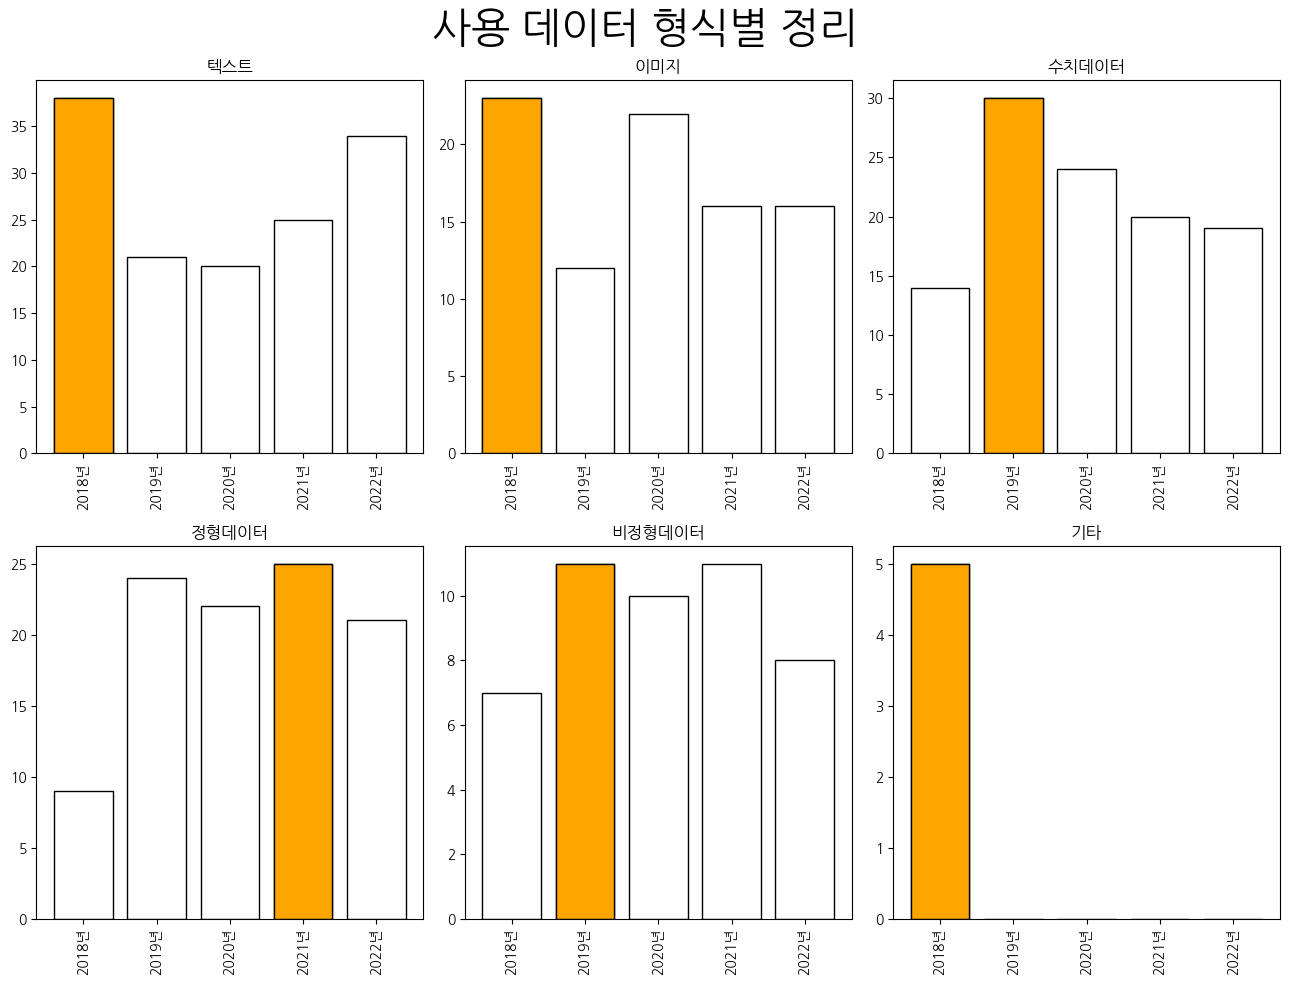

In [271]:
print_kosis_charts(3,2,"orange",format, "사용 데이터 형식별 정리")
# 비정형 데이터 사용률 증가 : https://www.ciokorea.com/news/315933
# 데이터의 전체적 사용 증가 : https://www.e4ds.com/sub_view.asp?ch=29&t=0&idx=11546#:~:text=%EB%B3%B4%EA%B3%A0%EC%84%9C%EC%97%90%20%EB%94%B0%EB%A5%B4%EB%A9%B4%202019%EB%85%84%20%EA%B8%B0%EC%A4%80%20%EC%A0%84%20%EC%84%B8%EA%B3%84%20%EA%B8%B0%EC%97%85%EB%93%A4%EC%9D%B4%20%EA%B4%80%EB%A6%AC%ED%95%98%EB%8A%94,%EC%9D%B4%EC%9D%B5%EC%9D%84%20%EA%B1%B0%EB%91%90%EA%B3%A0%20%EC%9E%88%EA%B1%B0%EB%82%98%20%EB%AF%B8%EB%9E%98%EC%97%90%20%EA%B7%B8%EB%9F%AC%ED%95%9C%20%EA%B3%84%ED%9A%8D%EC%9D%B4%20%EC%9E%88%EB%8B%A4%EA%B3%A0%20%EC%9D%91%EB%8B%B5%ED%96%88%EB%8B%A4.

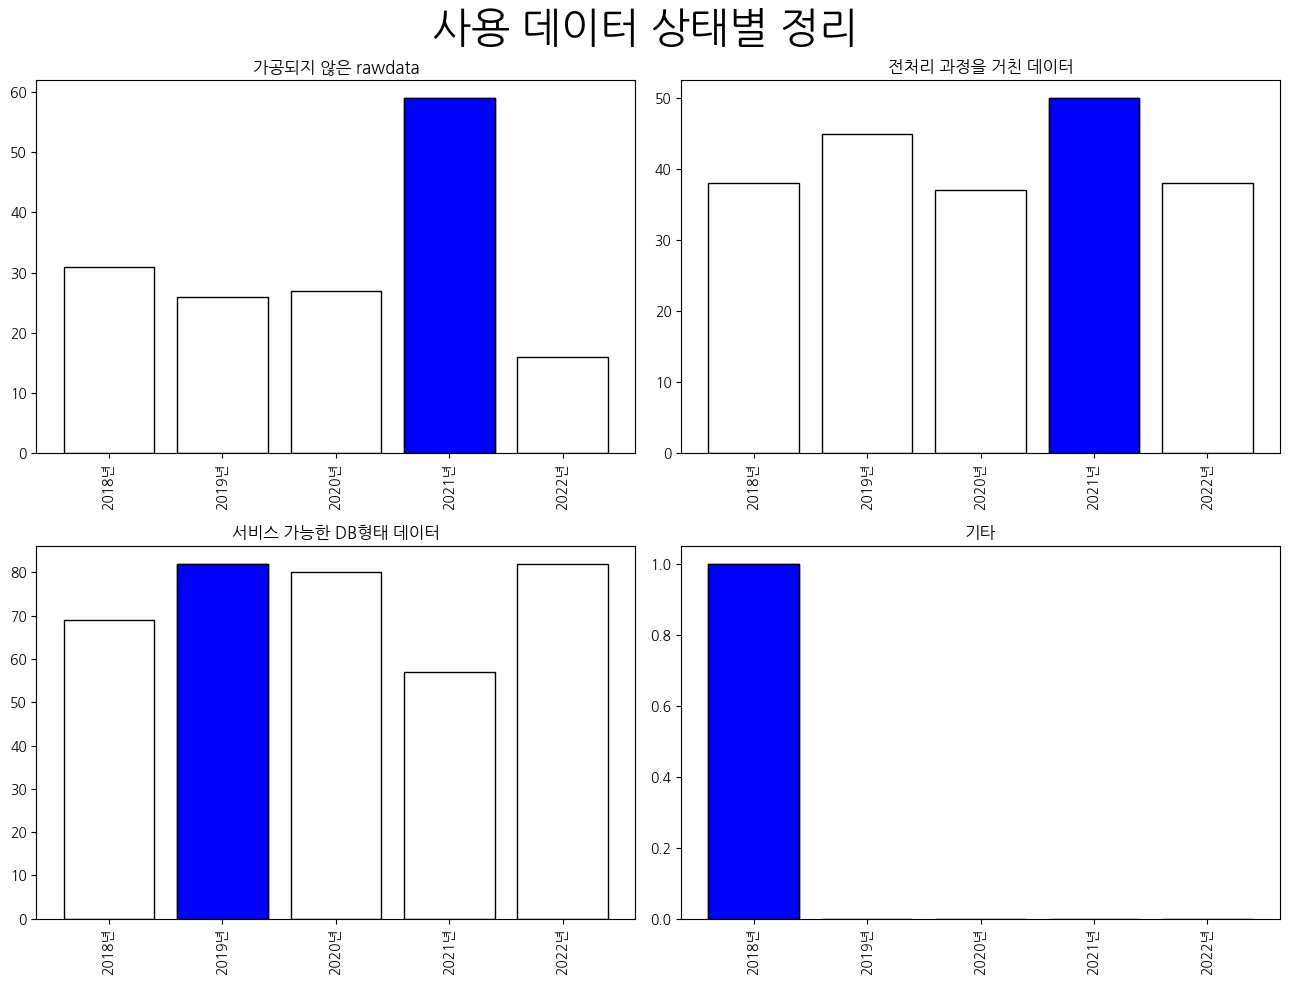

In [272]:
print_kosis_charts(2,2,"b",shape,"사용 데이터 상태별 정리")
# 서비스 가능한 DB형태 데이터 지원 : https://www.edaily.co.kr/news/read?newsId=02050006635838520&mediaCodeNo=257&OutLnkChk=Y
# 데이터베이스 서비스 : https://aws.amazon.com/ko/getting-started/decision-guides/databases-on-aws-how-to-choose/

In [273]:
purpose=pd.read_csv("데이터 유통 현황/데이터_거래_목적.csv")

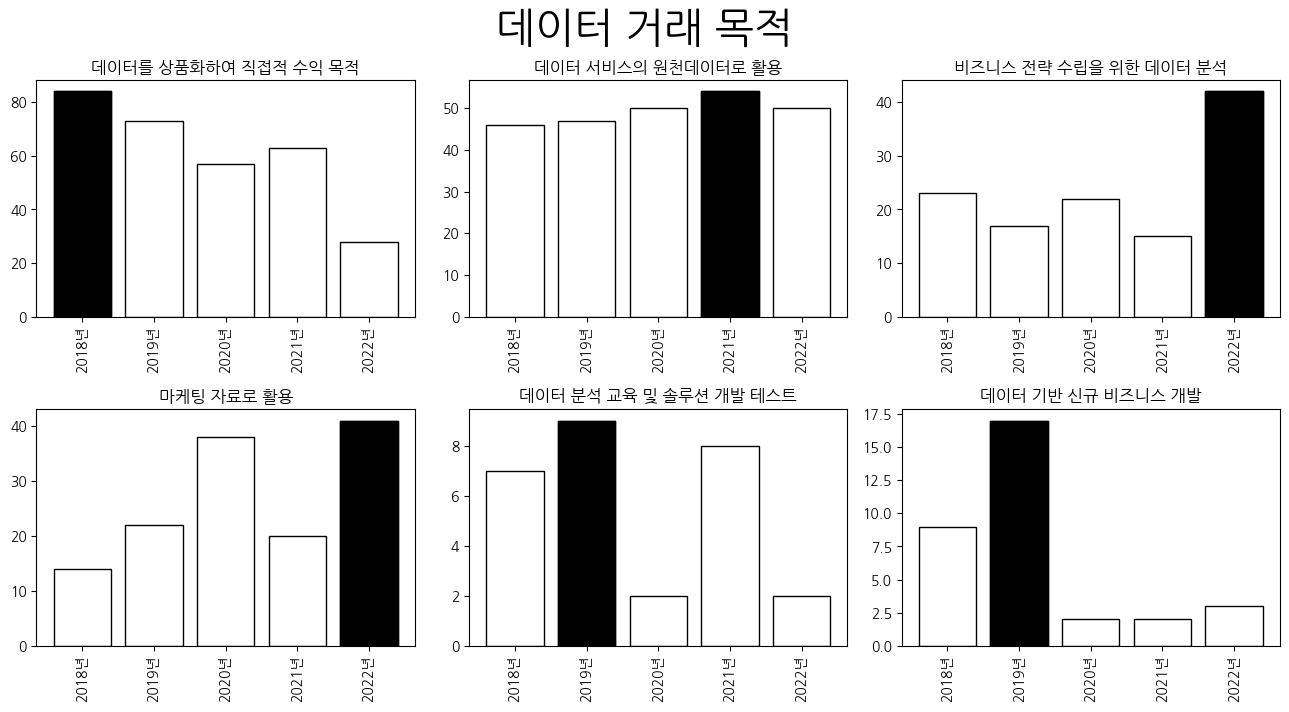

In [274]:

print_kosis_charts(3,3,'k',purpose,"데이터 거래 목적")
# 비즈니스 전략 수립을 위해 사용하는 AI를 위해 많은 데이터 필요 : https://www.etnews.com/20230918000084
# 빅데이터를 활용한 마케팅 포인트 : https://www.etnews.com/20210830000139
# 마케팅 국내외 성공사례 : https://www.samsungsds.com/kr/insights/1232585_4627.html

In [275]:
reason=pd.read_csv("데이터 유통 현황/데이터_거래가_없는_이유_미경험자.csv")

In [276]:
people=pd.read_csv("데이터_산업_증감.csv")
for col in people.columns[1:] :
    people[col]=people[col].str.replace(',','')
people

,Unnamed: 0,Unnamed: 1,2016년,2017년,2018년,2019년,2020년,2021년
0,데이터 처리 및 관리 솔루션 개발·공급업,데이터 수집·연계 솔루션 개발·공급업,399,341,445,504,518,551
1,NaN,데이터베이스 관리 시스템 솔루션 개발·공급업,155,135,119,146,149,186
2,NaN,데이터 분석 솔루션 개발·공급업,203,183,239,322,365,446
3,NaN,데이터 관리 솔루션 개발·공급업,879,854,1099,1059,1062,1105
4,NaN,데이터 보안 솔루션 개발·공급업,NaN,NaN,150,199,235,302
5,NaN,빅데이터 통합 플랫폼 솔루션 개발·공급업,65,95,78,126,158,206
6,NaN,소계,1701,1608,2130,2356,2487,2796
7,데이터 구축 및 컨설팅 서비스업,데이터 구축/가공 서비스업,1870,1594,2252,2140,2158,2229
8,NaN,데이터 관련 컨설팅 서비스업,811,1004,419,534,593,729
9,NaN,소계,2681,2598,2671,2674,2751,2958


In [277]:
people.fillna(0, inplace=True)
people[['2016년','2017년','2018년','2019년','2020년','2021년']]=people[['2016년','2017년','2018년','2019년','2020년','2021년']].astype('float64')
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  14 non-null     object 
 1   Unnamed: 1  14 non-null     object 
 2   2016년       14 non-null     float64
 3   2017년       14 non-null     float64
 4   2018년       14 non-null     float64
 5   2019년       14 non-null     float64
 6   2020년       14 non-null     float64
 7   2021년       14 non-null     float64
dtypes: float64(6), object(2)
memory usage: 1.0+ KB


In [278]:
people1=people.loc[:5,"Unnamed: 1":"2021년"] # 데이터 처리 및 관리 솔루션 개발·공급업
people2=people.loc[7:8,"Unnamed: 1":"2021년"] # 데이터 구축 및 컨설팅 서비스업
people3=people.loc[10:11,"Unnamed: 1":"2021년"] # 데이터 판매 및 제공 서비스업

In [279]:
def print_people(grid_x, grid_y, df, setcolor, settitle) :
    grid_size=(grid_y,grid_x)
    plt.figure(figsize=(13, 10))

    for i in range(0,df.shape[0]) : 
        y=list(map(int,df.iloc[i, 1:].values))
        max_value_index=y.index(max(y))
        #print((i,int(i/grid_y),(i%grid_x)))
        plt.subplot2grid(grid_size,(int(i/grid_x),i%grid_x), rowspan=1,colspan=1)
        plt.bar(df.columns[1:],y,color='w',edgecolor='k')
        plt.bar(max_value_index,max(y),color=setcolor,edgecolor='k')
        plt.title(df.iloc[i,0])
        plt.xticks(range(6), [f'{i}년' for i in range(2016,2022)],rotation=90)
        
    plt.suptitle(settitle, size=30)
    plt.tight_layout()
    plt.show()

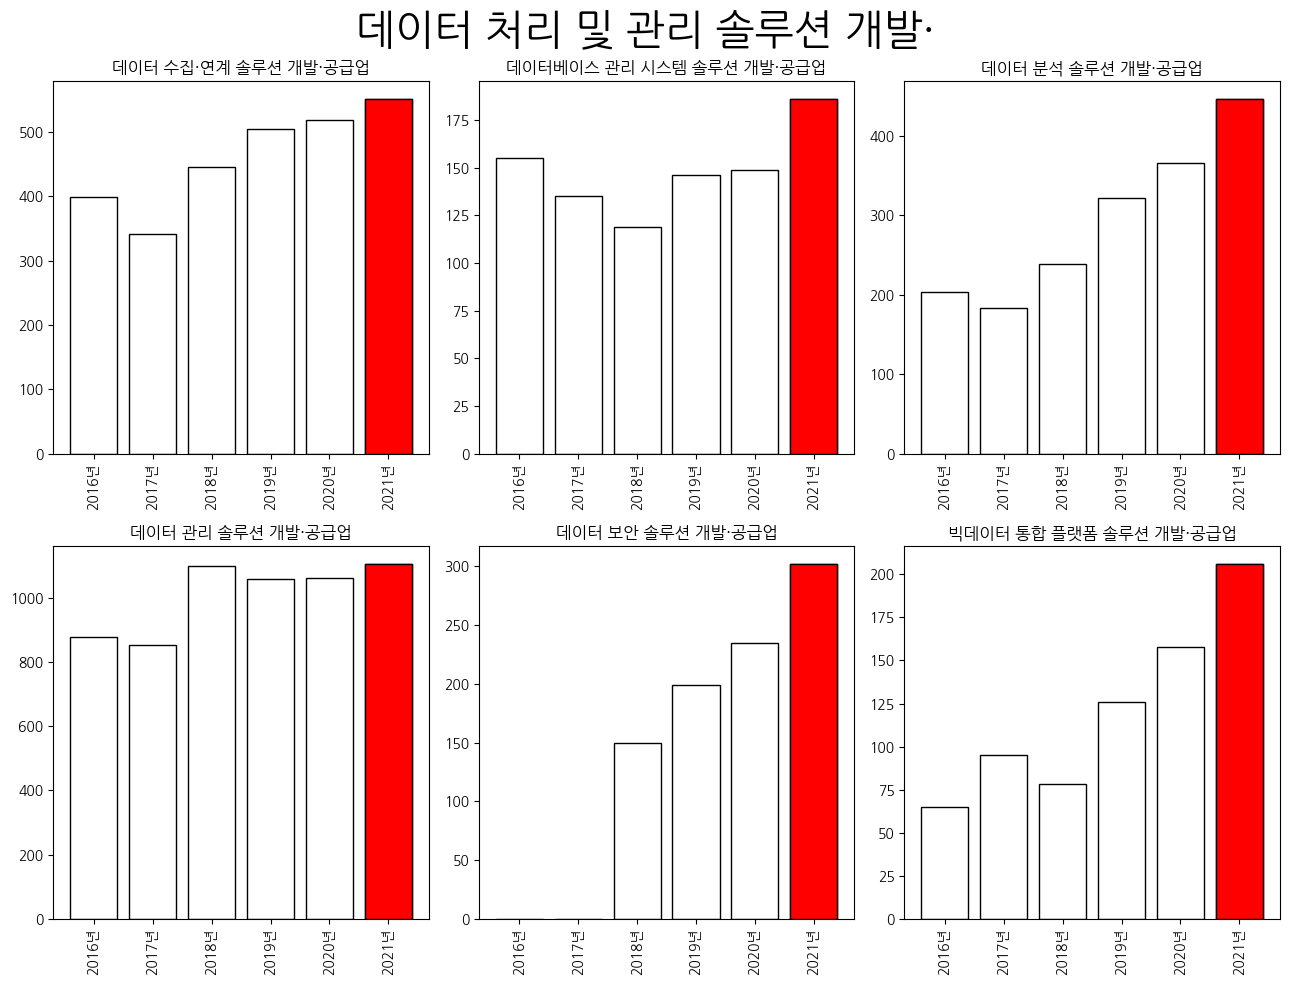

In [280]:
print_people(3,2,people1,'r',"데이터 처리 및 관리 솔루션 개발·")

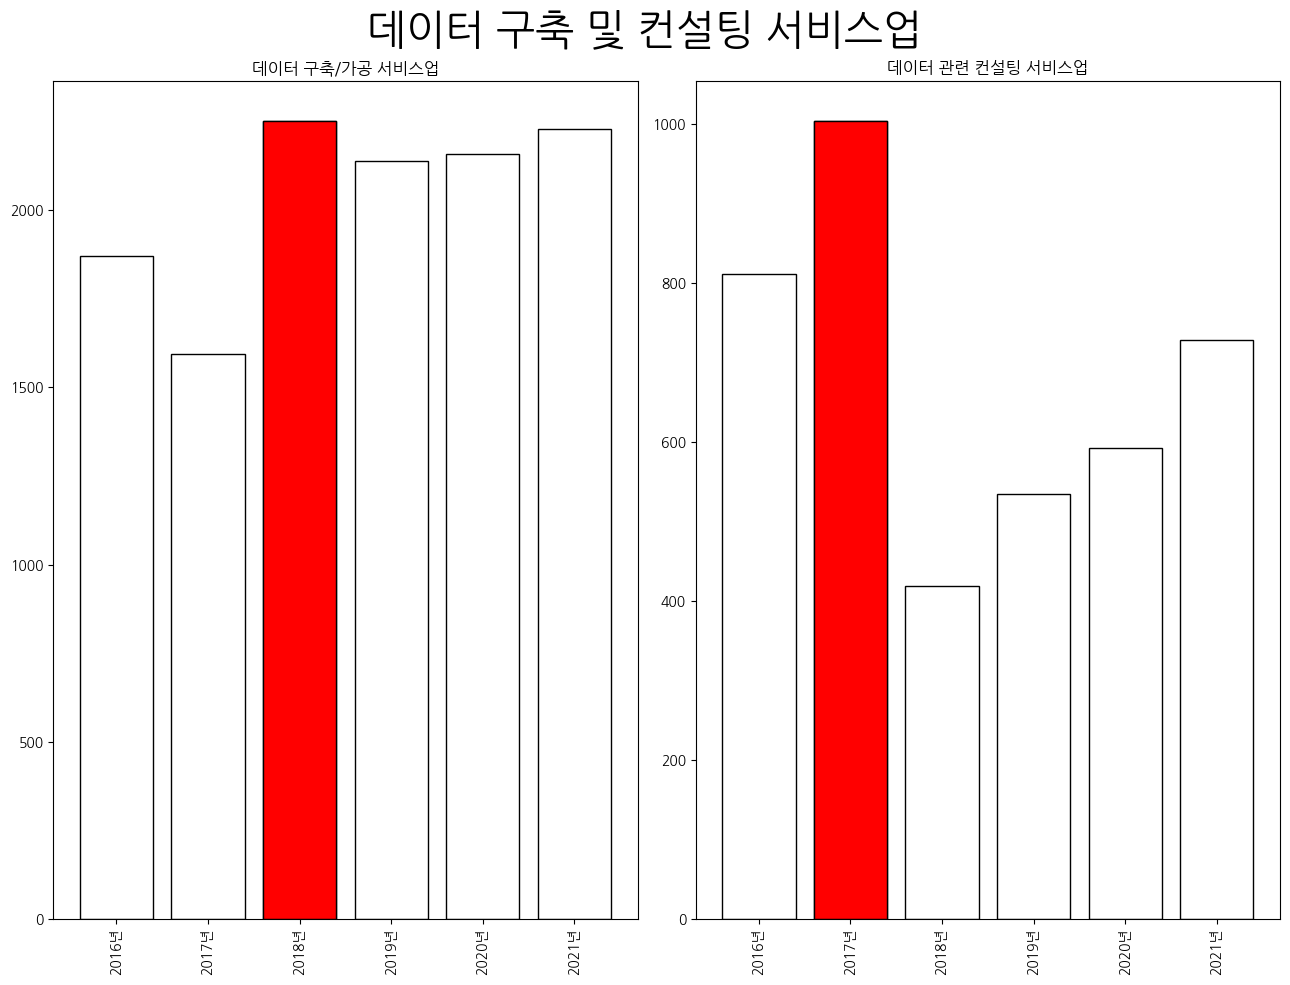

In [281]:
print_people(2,1,people2,'r',"데이터 구축 및 컨설팅 서비스업")

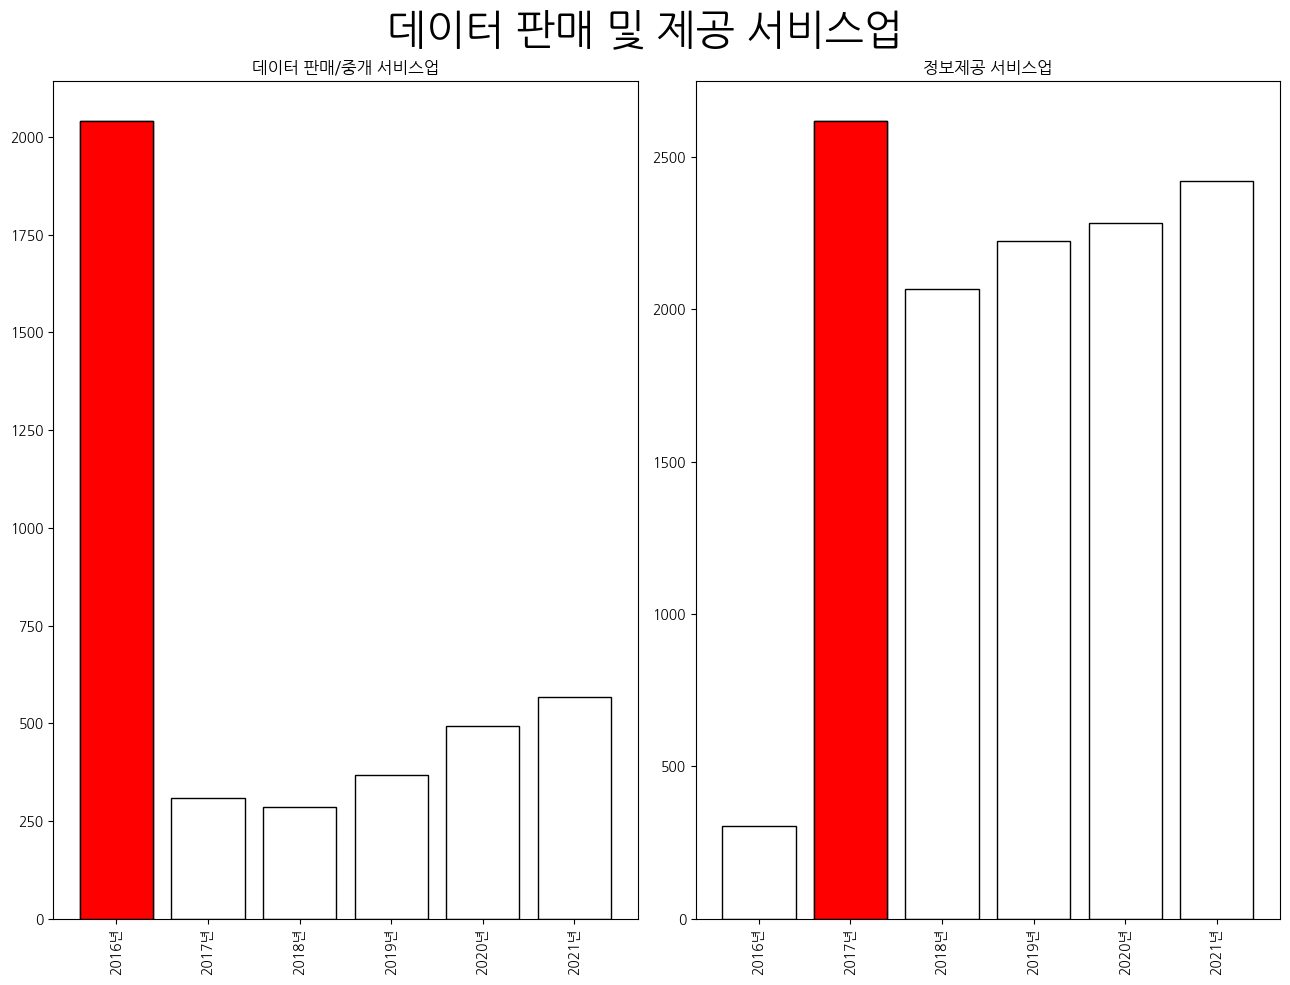

In [282]:
print_people(2,1,people3,'r',"데이터 판매 및 제공 서비스업")

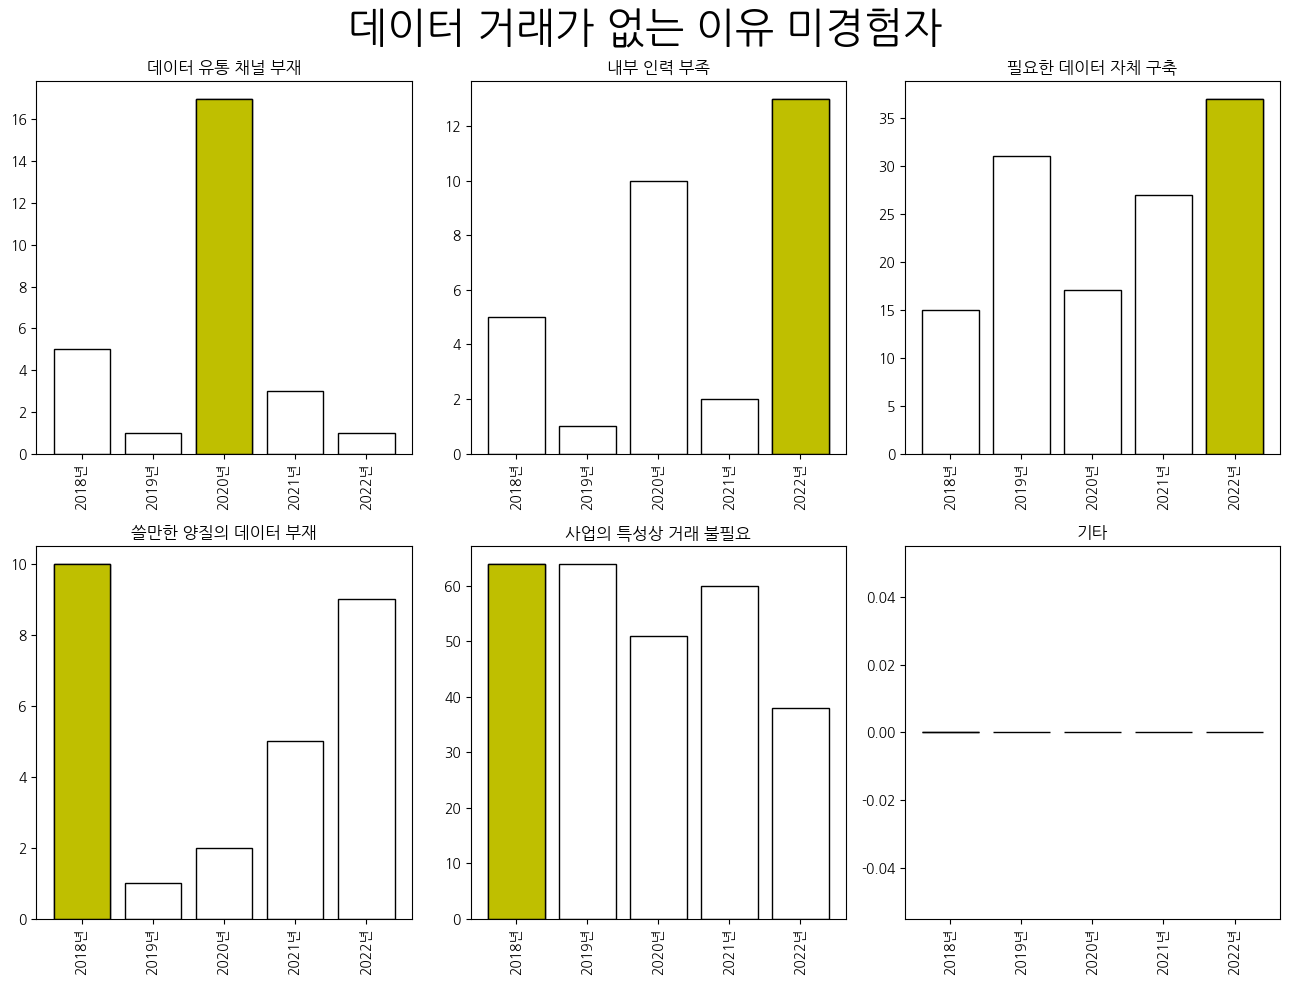

In [283]:
print_kosis_charts(3,2,'y',reason,"데이터 거래가 없는 이유 미경험자")
# 데이터 유통 채널 부재 -> 빅데이터 통합 플랫폼 솔루션 개발 기업의 증가 people1(158->206)
# 데이터 처리 및 관리 솔루션 개발의 전체적 상승(내부인력부족)
# 데이터 판매 및 제공 서비스업(필요한 데이터 자체 구축)

# 데이터센터 구축 : https://www.newspim.com/news/view/20200908000371
# 데이터 구축 여부 판단 : https://www.itworld.co.kr/news/198099
# 셀트리온 : https://www.sedaily.com/NewsView/2D471IWVCC
# 한국전력공사 : https://zdnet.co.kr/view/?no=20211217163111

In [284]:
notice=pd.read_csv("데이터 유통 현황/데이터_거래의_애로사항.csv")

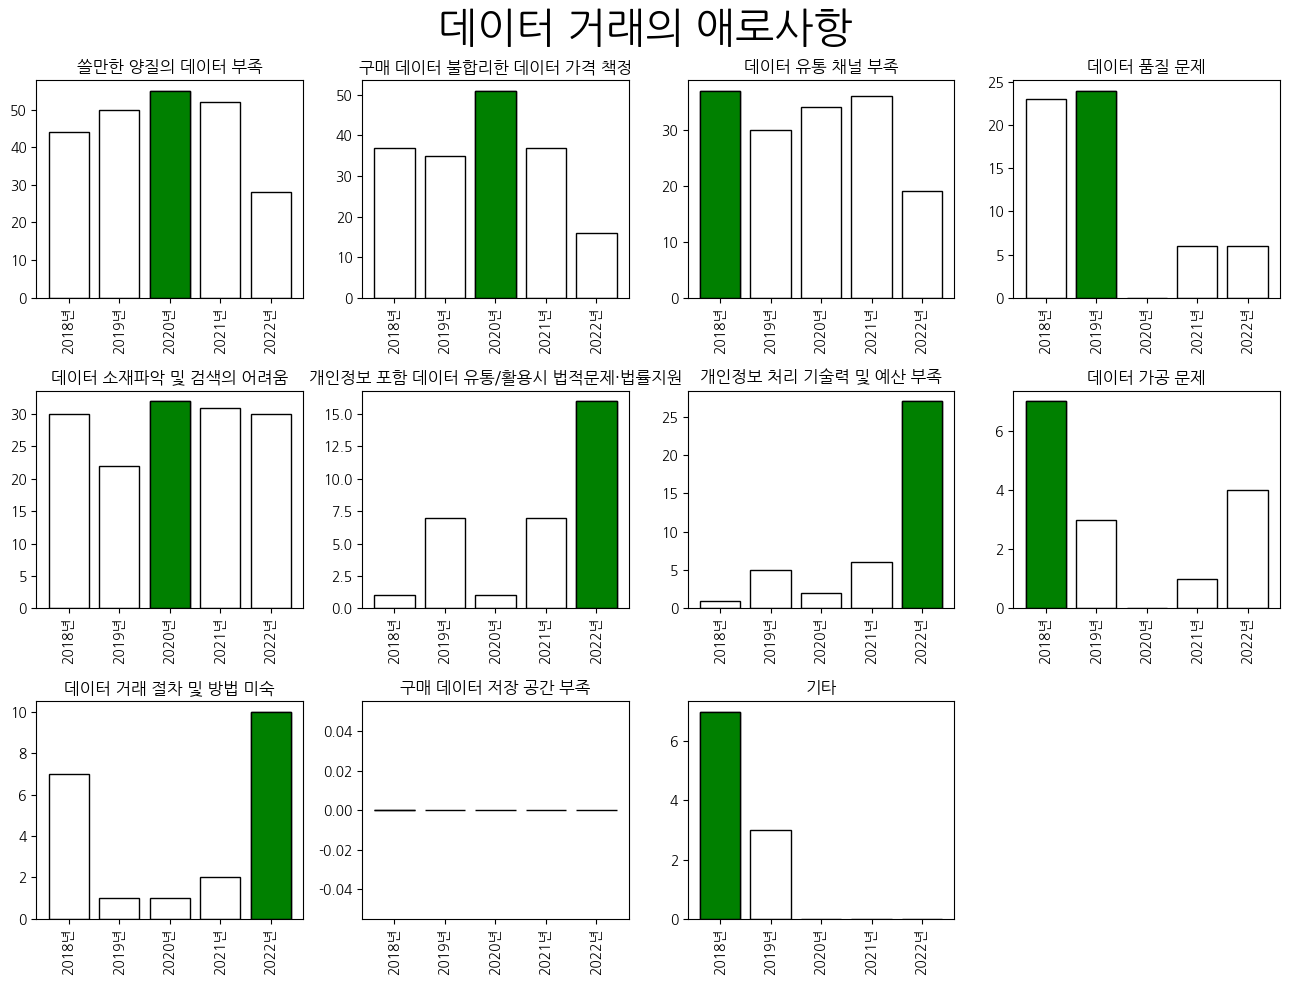

In [285]:
print_kosis_charts(4,3,'g',notice,"데이터 거래의 애로사항")
# 개인정보 포함 데이터 유통/활용시 법적문제,법률지원 : 데이터 컨설턴트, 데이터 기획자자의 급증 예상
# 데이터 거래 절차 및 방법 미숙 : 공급영역별 시장규모에서 "데이터 수집,연계 솔루션" 개발 공급업 증가

# 인력부족 : https://www.edaily.co.kr/news/read?newsId=01433366625800080
# 채용 증가 : https://www.hankyung.com/article/202401218946i